In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

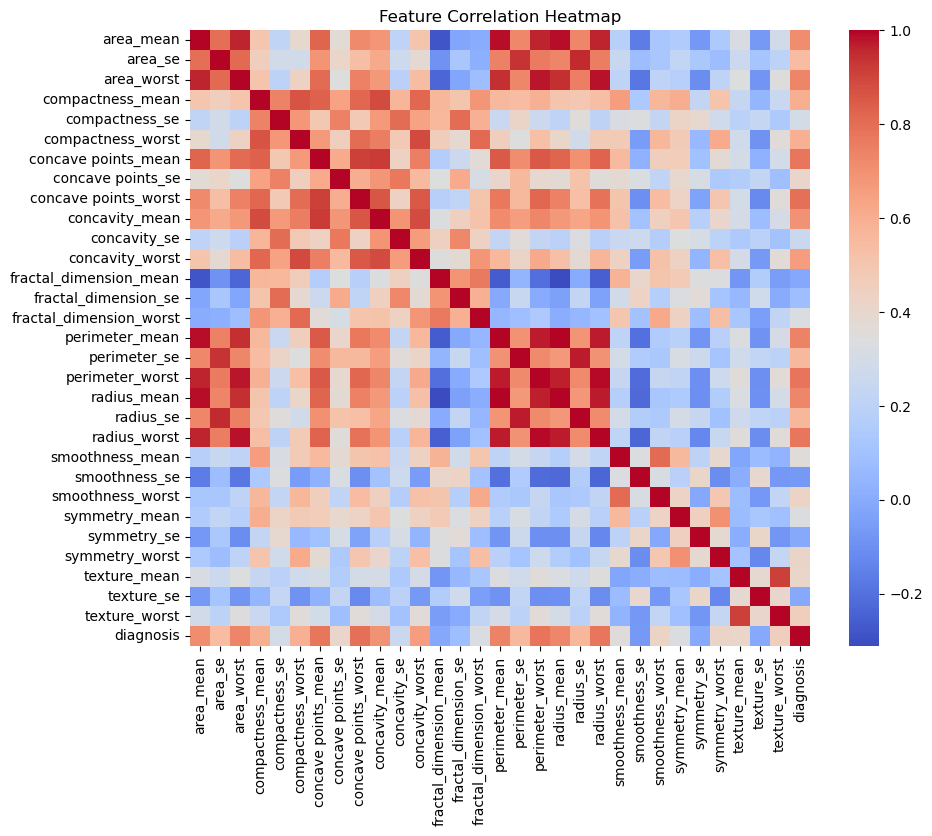

In [ ]:
breast_cancer_df = pd.read_csv('breast_cancer.csv')


def plot_correlation_heatmap(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot = False, cmap = 'coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()


plot_correlation_heatmap(breast_cancer_df)

In [63]:
def show_performance_metrics(y_test, y_test_predicted):
    print('PERFORMANCE METRICS')
    print(f"Accuracy: {accuracy_score(y_test, y_test_predicted):.2f} | "
          f"Precision: {precision_score(y_test, y_test_predicted):.2f} | "
          f"Recall: {recall_score(y_test, y_test_predicted):.2f} | "
          f"F1: {f1_score(y_test, y_test_predicted):.2f} ")
    print('Confusion matrix: \n {0}'.format(confusion_matrix(y_test, y_test_predicted)))
    

def show_cv_scores(model, X_train, y_train, cv = 5):
    cv_scores = cross_val_score(model, X_train, np.ravel(y_train), cv = cv)
    print("CV SCORES")
    print(cv_scores)
    print( "Accuracy cv: {0: 0.2f}, Std: {1: 0.2f}".format(np.mean(cv_scores), np.std(cv_scores)) )  


def compute_correlation_matrix(dataframe):
    return dataframe.corr()


def get_highly_correlated_features(correlation_matrix, target_column, threshold = 0.2):
    target_correlation = correlation_matrix[target_column].sort_values(ascending = False)
    important_features = target_correlation[target_correlation.abs() > threshold].index.tolist()
    important_features.remove(target_column)
    return important_features


def get_X_with_select_features_by_correlation(breast_cancer_df, target_column='diagnosis', threshold = 0.2):
    correlation_matrix = compute_correlation_matrix(breast_cancer_df)
    important_features = get_highly_correlated_features(correlation_matrix, target_column, threshold)
    return breast_cancer_df[important_features]


def train_model(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    model.fit(X_train, y_train)

    y_test_predicted = model.predict(X_test)

    show_performance_metrics(y_test, y_test_predicted)
    show_cv_scores(model, X_train, y_train, 5)


def train_model_from_file(file_name):
    breast_cancer_df = pd.read_csv(file_name)

    X_selected_by_correlation = get_X_with_select_features_by_correlation(breast_cancer_df)
    y = breast_cancer_df['diagnosis']

    best_model = RandomForestClassifier(class_weight='balanced', random_state = 42, n_estimators = 100, max_depth = None, min_samples_split = 2)

    train_model(X_selected_by_correlation, y, best_model)


train_model_from_file("breast_cancer.csv")

PERFORMANCE METRICS
Accuracy: 0.98 | Precision: 0.98 | Recall: 0.95 | F1: 0.97 
Confusion matrix: 
 [[107   1]
 [  3  60]]
CV SCORES
[0.95       0.95       0.9625     0.93670886 0.96202532]
Accuracy cv:  0.95, Std:  0.01


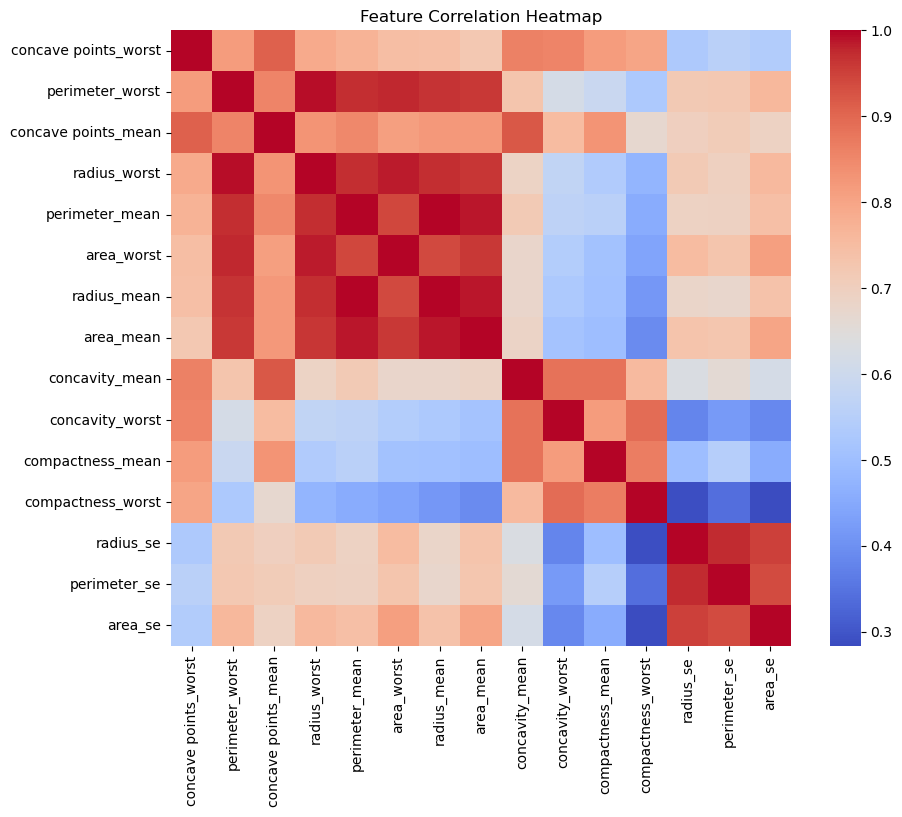

In [ ]:
X_selected_by_correlation = get_X_with_select_features_by_correlation(breast_cancer_df)
plot_correlation_heatmap(X_selected_by_correlation)